## Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("downloads/survey lung cancer.csv")

 # data cleaning

In [7]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

## no null values present

In [9]:
df["GENDER"].unique()

array(['M', 'F'], dtype=object)

In [10]:
df["LUNG_CANCER"].unique()

array(['YES', 'NO'], dtype=object)

C:\Users\krish\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


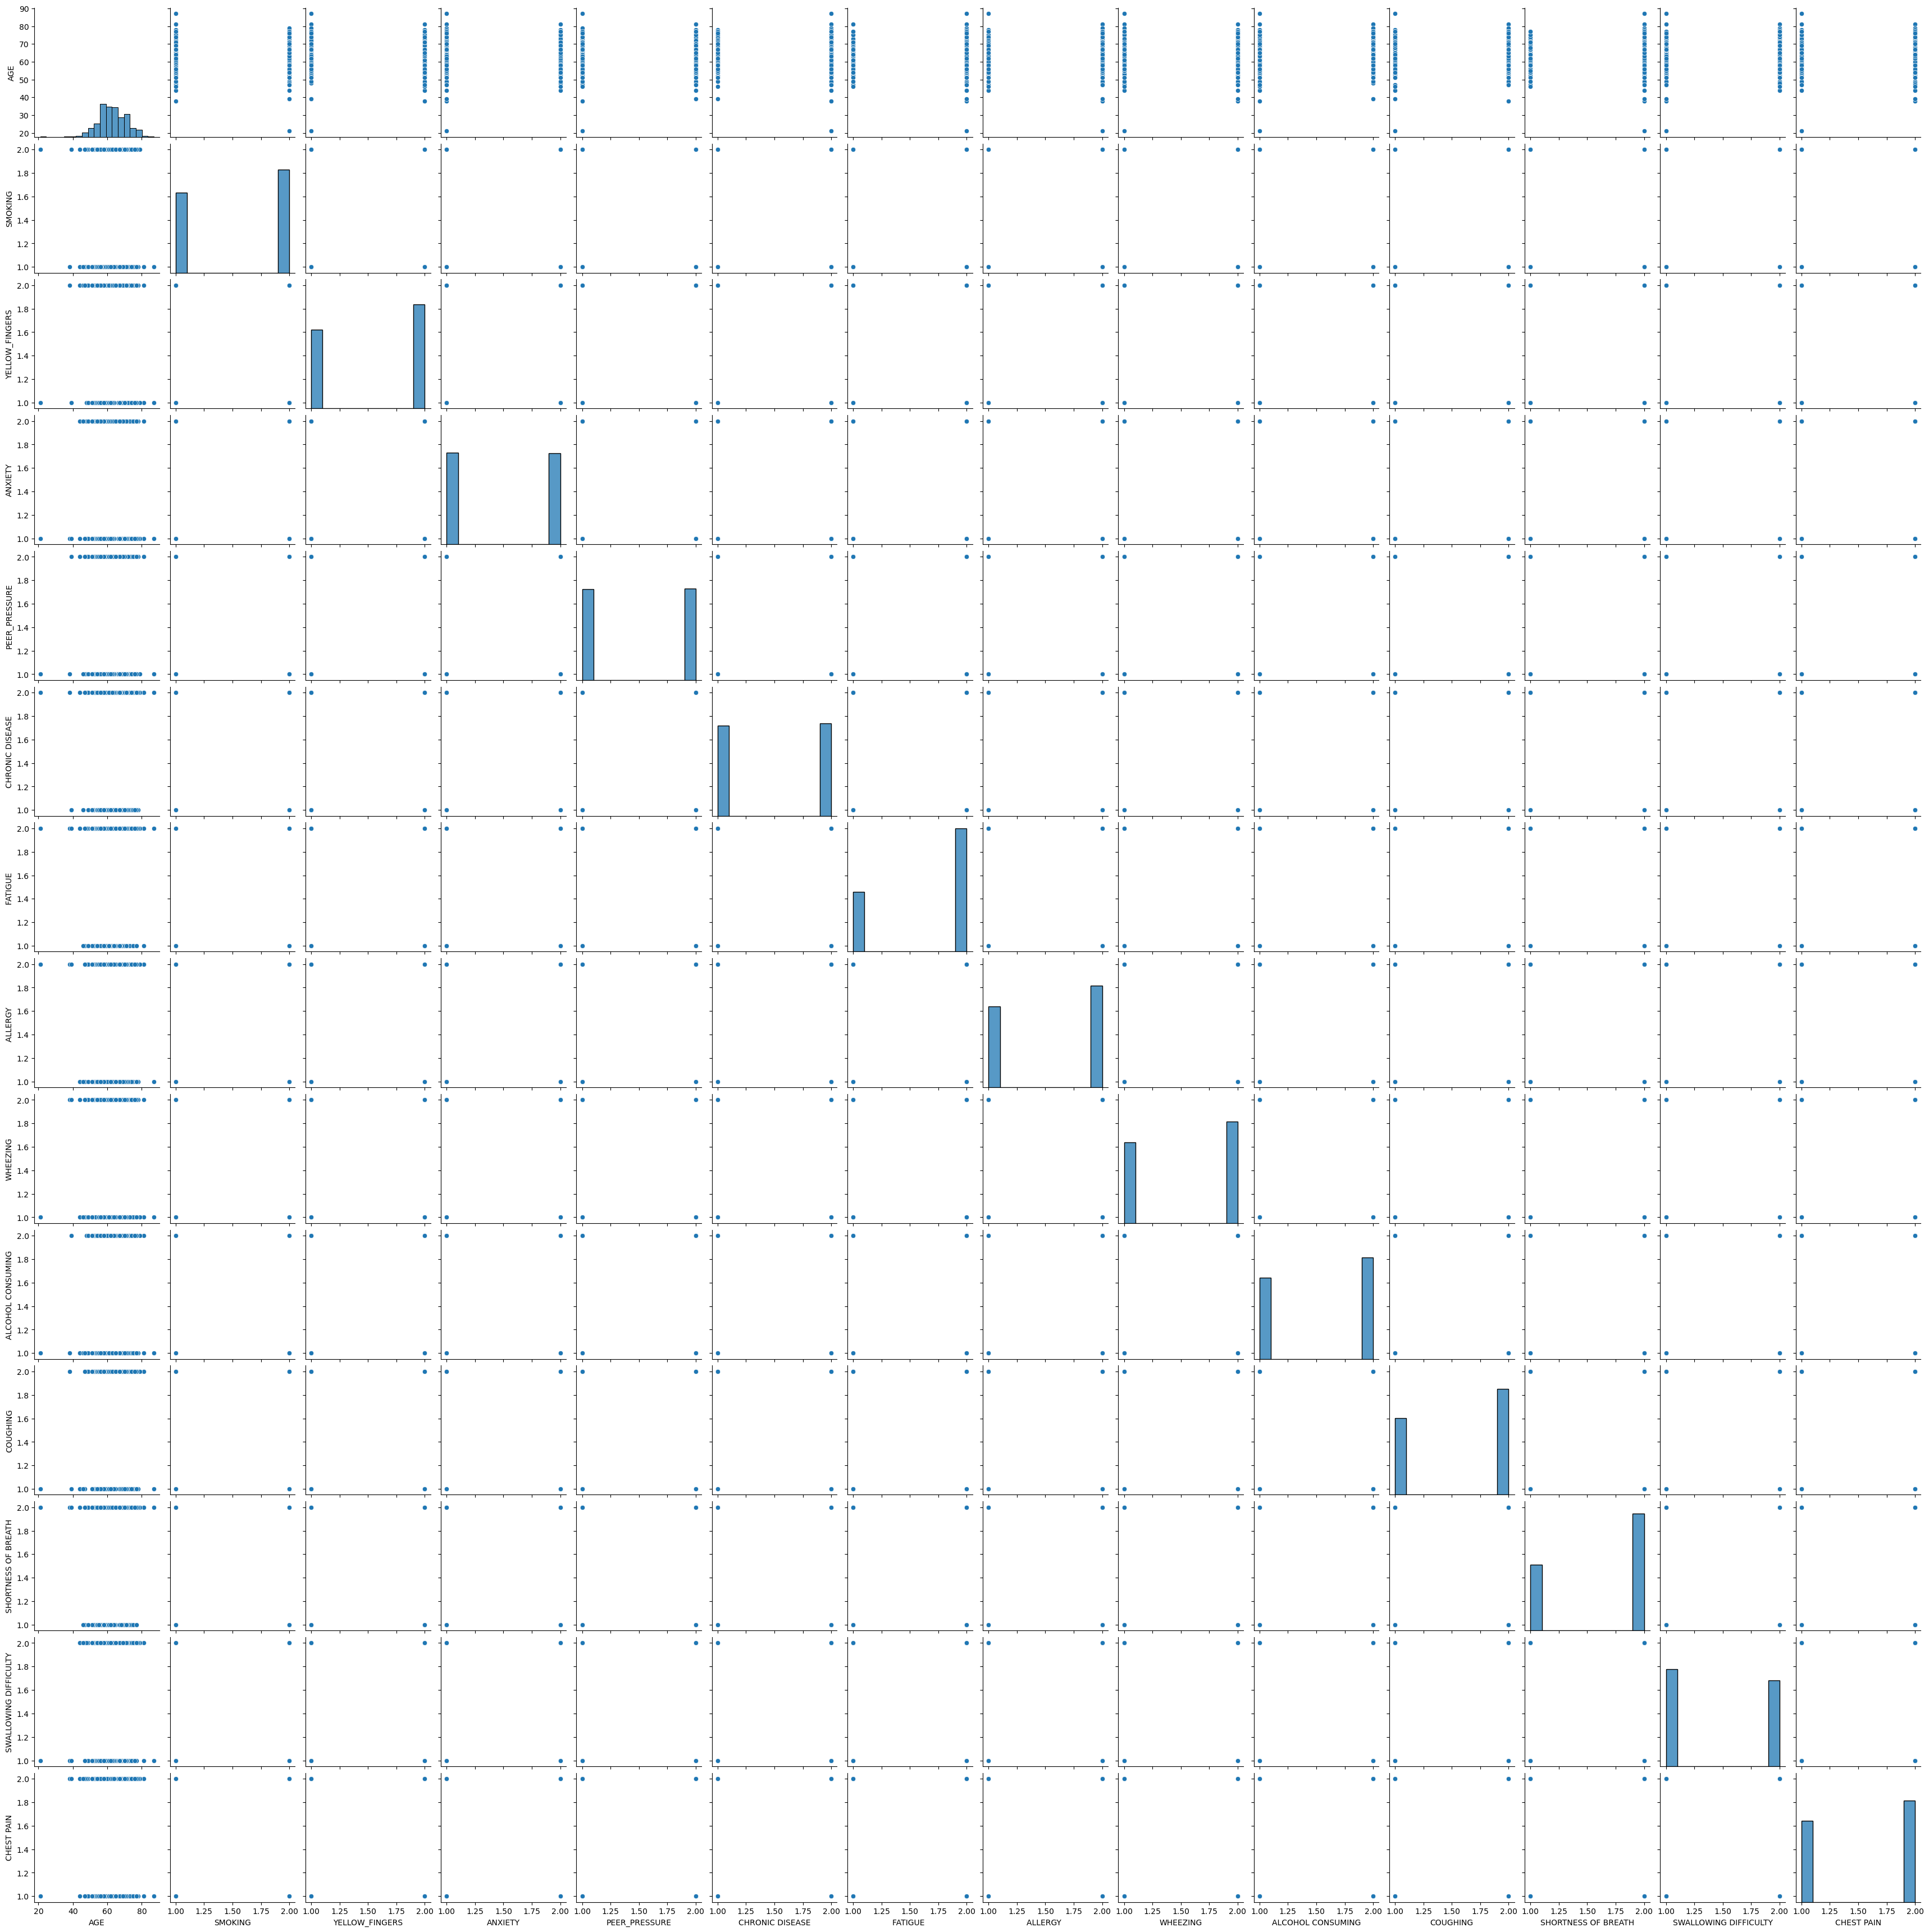

In [11]:
sns.pairplot(data = df)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
df['GENDER'] = encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = encoder.fit_transform(df['LUNG_CANCER'])

## finding correlations in features and label

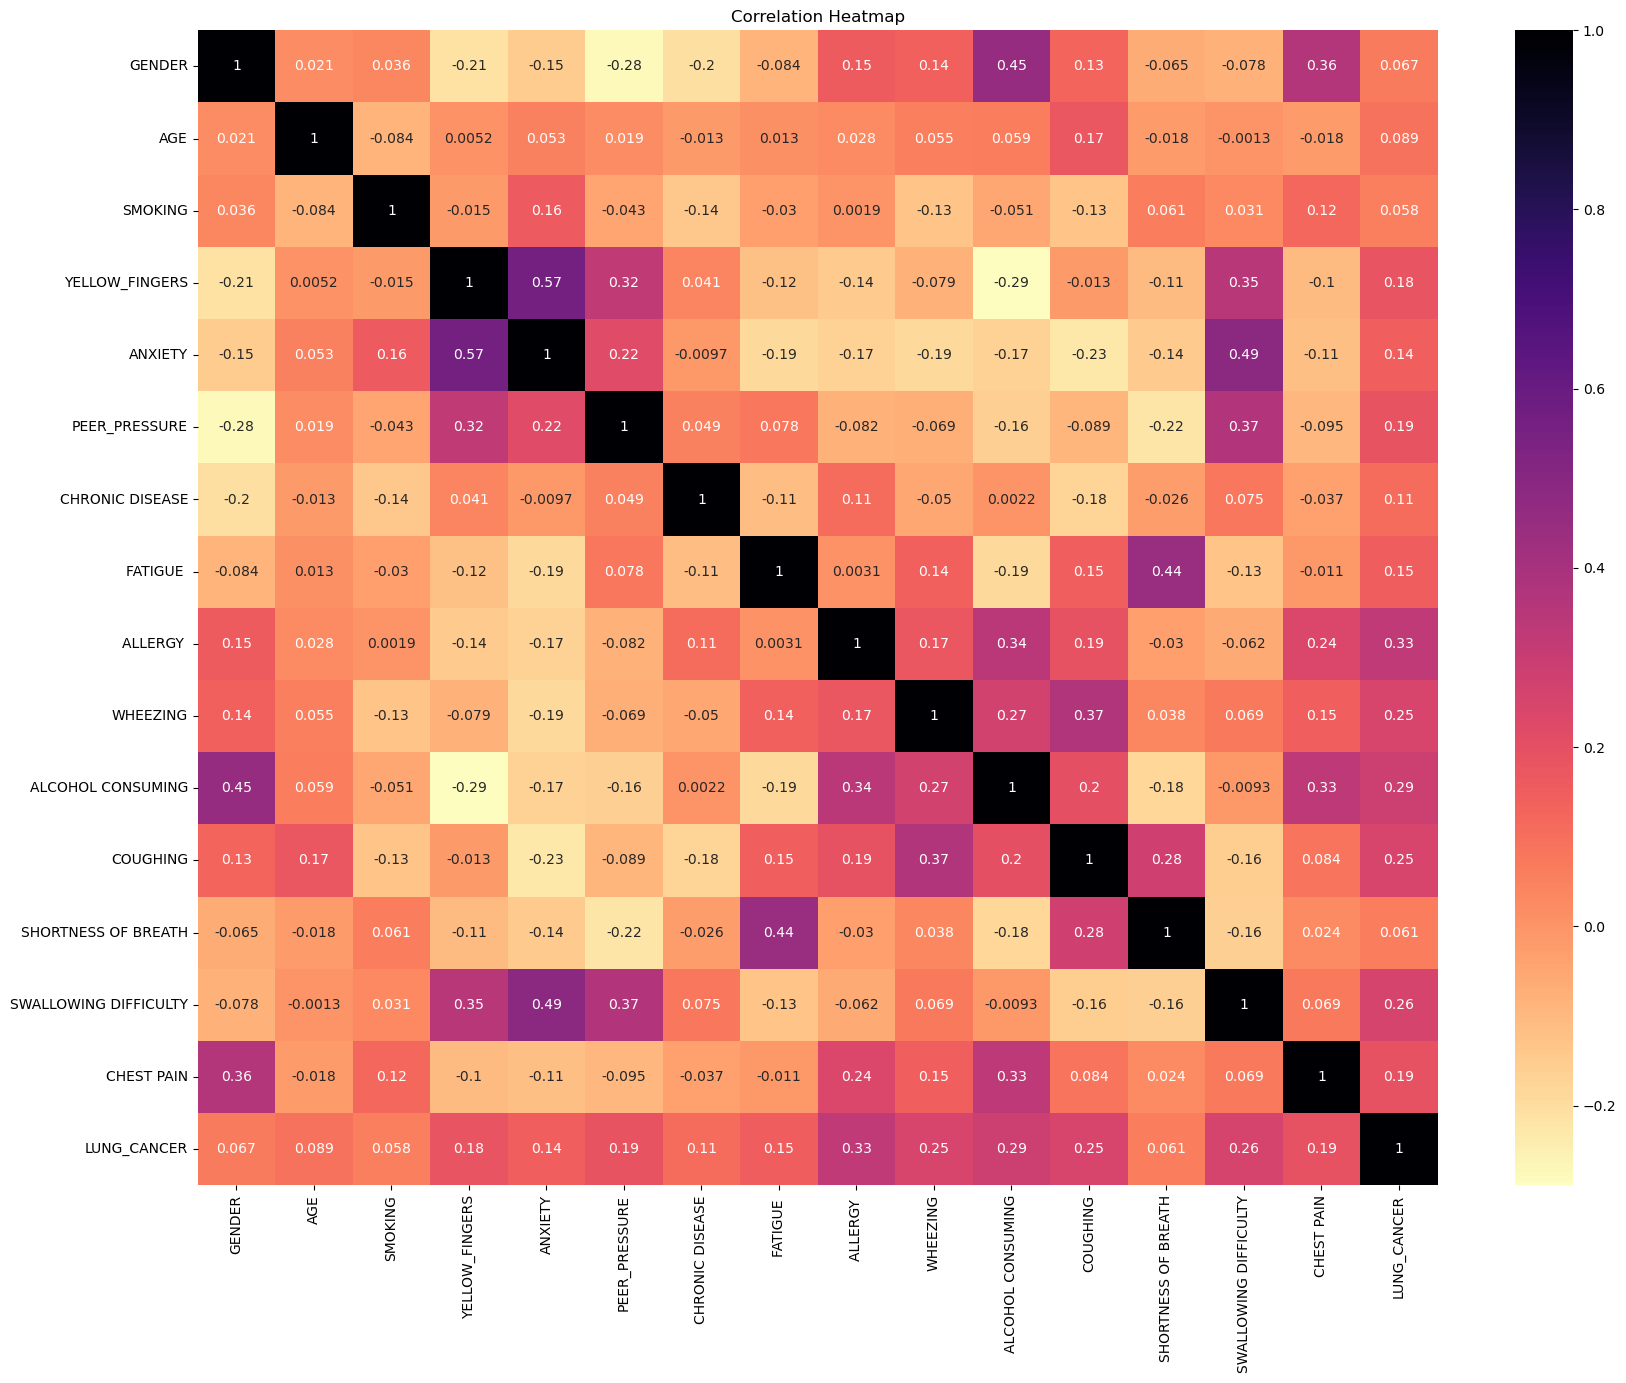

In [14]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True, cmap = "magma_r")
plt.title("Correlation Heatmap")
plt.show()

## Assingning Features and Labels

In [15]:
x = df.drop(["LUNG_CANCER"], axis = 1)

In [16]:
y = df["LUNG_CANCER"]

In [17]:
x = x.values
y = y.values

# Splitting Test and Train Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression

## Testing Logistic Regression Model

In [21]:
model = LogisticRegression()

In [22]:
model.fit(x_train, y_train)

C:\Users\krish\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = model.predict(x_test)

## checking the model accuracy

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 1  1]
 [ 0 60]]


In [26]:
from sklearn.metrics import r2_score
r2_score = model.score(x_test,y_test)

In [27]:
print(r2_score*100,'%')

98.38709677419355 %


## Testing Random Forest Classifier Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(n_estimators = 3, criterion = "entropy")

In [30]:
model.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=3)

In [31]:
y_pred = model.predict(x_test)

## checking the model accuracy

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.98      0.97      0.97        60

    accuracy                           0.95        62
   macro avg       0.66      0.73      0.69        62
weighted avg       0.96      0.95      0.96        62



In [33]:
r2_score = model.score(x_test,y_test)

In [34]:
print(r2_score*100,'%')

95.16129032258065 %


Logistic Regression Model has more accuracy than Random Forest Classifier Model.